In [1]:
import sys, os
# add relative parent directory to path
sys.path.append(os.path.dirname(os.getcwd()))

from vgc.behaviour.BattlePolicies import *
import utils.scraping_data as scraping_data
from policies.PrunedTreeSearch import PrunedTreeSearch
from policies.Heuristical import Heuristical

In [2]:

n_battles_per_file = 200

policies = [RandomPlayer(), OneTurnLookahead(), TypeSelector(), BreadthFirstSearch(),
             PrunedBFS(), TunedTreeTraversal(), Heuristical(), PrunedTreeSearch()]

policies_names = [policy.__class__.__name__ for policy in policies]


n = len(policies)


In [ ]:
for i in range(n):
    # pruned tree search vs all other policies
    scraping_data.run_and_update_battle(
        PrunedTreeSearch(),
        policies[i],
        n_to_emulate=n_battles_per_file,
        max_battles_in_file=n_battles_per_file,
        verbose=True)

Emulating battle 1/200 (total 1/200) between PrunedTreeSearch and RandomPlayer
Turn 1 - Player 1 took choice in 12.6173s
Turn 1 - Player 2 took choice in 0.0000s


In [3]:
for i, player0 in enumerate(policies):
    for j, player1 in enumerate(policies):
        if i < j: # only play each pair once
            continue
        print(f"{(i)*(i+1)/2+j+1:.0f}/{n*(n+1)/2:.0f}: {policies_names[i]} vs {policies_names[j]}")
        scraping_data.run_and_update_battle(player0, player1, n_to_emulate=n_battles_per_file, max_battles_in_file=n_battles_per_file, verbose=True)

1/36: RandomPlayer vs RandomPlayer
Emulating battle 1/200 (total 200/200) between RandomPlayer and RandomPlayer
Turn 1 - Player 1 took choice in 0.0010s
Turn 1 - Player 2 took choice in 0.0000s
Turn 2 - Player 1 took choice in 0.0000s
Turn 2 - Player 2 took choice in 0.0000s
Turn 3 - Player 1 took choice in 0.0000s
Turn 3 - Player 2 took choice in 0.0000s
Turn 4 - Player 1 took choice in 0.0000s
Turn 4 - Player 2 took choice in 0.0000s
Turn 5 - Player 1 took choice in 0.0000s
Turn 5 - Player 2 took choice in 0.0000s
Turn 6 - Player 1 took choice in 0.0000s
Turn 6 - Player 2 took choice in 0.0000s
Turn 7 - Player 1 took choice in 0.0000s
Turn 7 - Player 2 took choice in 0.0000s
Turn 8 - Player 1 took choice in 0.0000s
Turn 8 - Player 2 took choice in 0.0000s
Turn 9 - Player 1 took choice in 0.0000s
Turn 9 - Player 2 took choice in 0.0000s
Player 1 wins!
2/36: OneTurnLookahead vs RandomPlayer
Emulating battle 1/200 (total 200/200) between OneTurnLookahead and RandomPlayer
Turn 1 - Player

KeyboardInterrupt: 

[[0.002071366310119629, 0.0017497968673706055, 0.0015483379364013671, 0.0014522902819575096, 0.0013624647612212808, 0.001215390944748782, 0.001127119188184862, 0.0011708067174543415, 0.0009497784553690159, 0.0010727824586810489], [2.017498016357422e-05, 3.3431053161621093e-05, 4.010438919067383e-05, 7.175182809635085e-05, 4.274870759697371e-05, 2.8170896380135184e-05, 2.62446217722707e-05, 0.0, 2.3709966781291554e-05, 0.0]]


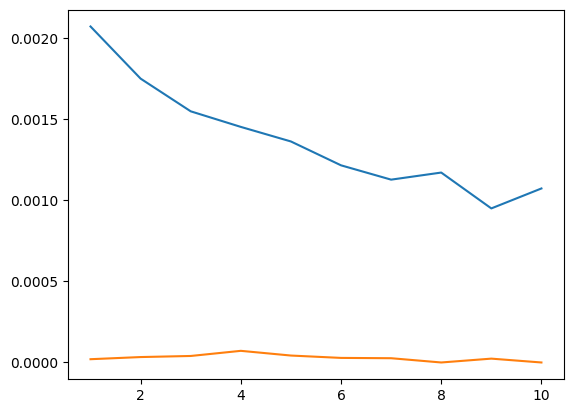

In [2]:
import sys, os
# add relative parent directory to path
sys.path.append(os.path.dirname(os.getcwd()))

import matplotlib.pyplot as plt
import numpy as np
import json
import utils.scraping_data as s
with open("data\sequential\\all_except_pts\\Heuristical_vs_OneTurnLookahead.json", "r") as f:
    battle_data = json.load(f)

# create data
y = s.get_avg_turn_time_per_turn(battle_data, max_turn=10)
print(y)
# plot lines
for p in y:
    x = range(1,len(p)+1)
    plt.plot(x, p)

plt.show()

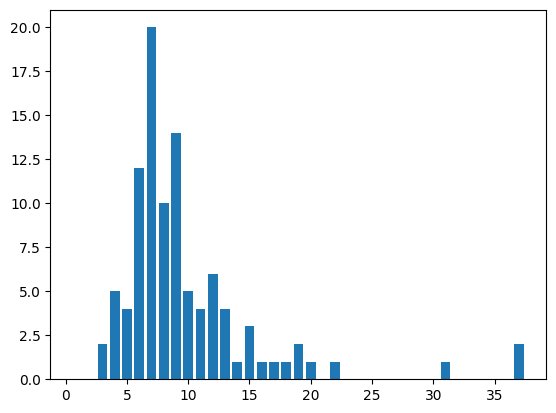

In [5]:

# plot bars
y = s.get_games_per_turn_count(battle_data)
x = range(1, len(y)+1)
plt.bar(x, y)
plt.show()